In [1]:
# our first task is to grab only the 2012 and 2014 data

import pandas as pd
import numpy as np
df = pd.read_csv('2014.csv')

# first let's replace some dashes

areas = ['Numeracy','Reading','Spelling','Writing','Grammar']
years = ['3','5','7','9']
for a in areas:
    for y in years:
        df['Year %s | %s'%(y,a)] = df['Year %s | %s'%(y,a)].replace('-',np.nan)
        
# now let's add an overall for each year group

# First we make sure they are integers
df[df.columns[-21:-1]] = df[df.columns[-21:-1]].astype('float')

for y in years:
    cols = []
    for a in areas:
        cols.append('Year %s | %s'%(y,a))
    df['Year %s | Overall'%y] = df[cols].mean(axis=1)
        
now = df[df['Year'] == 2014]
then = df[df['Year'] == 2012]

/Applications/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Applications/anaconda/lib/python2.7/argparse.pyc, but /Applications/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [6]:
from IPython.display import display
cohorts = [5,7,9]

for coh in cohorts:
    
    # let's grab the fourteen data that has year coh naplan scores
    
    #for a in areas:
    #    now = now[now['Year %s | %s'%(str(coh),a)].notnull()]
    
    # now let's merge it with the twelve data with year (coh-2) scores
    
    #for a in areas:
    #    then = then[then['Year %s | %s'%(str(coh-2),a)].notnull()]

    newdf = pd.merge(now,then,on='SMCLID')
    
    # now let's see what the worst improvers are

    newdf['Improv | %s-%s'%(str(coh-2),str(coh))] = newdf['Year %s | Overall_x'%str(coh)] - newdf['Year %s | Overall_y'%str(coh-2)]
    print 'Schools with small improvements between year %s in 2012 and year %s in 2014'%(str(coh-2),str(coh))
    display(newdf.sort('Improv | %s-%s'%(str(coh-2),str(coh)),ascending=False)[:10].reset_index()[['Name_x','Location_x','School sector_x','Year range_x','Full-time equivalent enrolments_x','Improv | %s-%s'%(str(coh-2),str(coh)),'Year %s | Overall_x'%str(coh),'Year %s | Overall_y'%str(coh-2)]])

Schools with small improvements between year 3 in 2012 and year 5 in 2014


,Name_x,Location_x,School sector_x,Year range_x,Full-time equivalent enrolments_x,Improv | 3-5,Year 5 | Overall_x,Year 3 | Overall_y
0,"Tintinara Area School, Tintinara, SA",Provincial,Government,R-12,101.4,140.8,512.4,371.6
1,"Yankalilla Area School, Yankalilla, SA",Provincial,Government,R-12,364.2,138.8,494.6,355.8
2,"Streaky Bay Area School, Streaky Bay, SA",Remote,Government,"U, R-12",243.2,135.8,470.2,334.4
3,"Evanston Gardens Primary School, Evanston Gard...",Metropolitan,Government,R-7,115,134.6,450.0,315.4
4,"Yorketown Area School, Yorketown, SA",Remote,Government,R-12,247.3,130.0,458.4,328.4
5,"Paracombe Primary School, Paracombe, SA",Provincial,Government,R-7,67,124.6,506.4,381.8
6,"John Hartley School (B-7), Smithfield Plains, SA",Metropolitan,Government,"U, R-7",545,123.4,436.0,312.6
7,"Felixstow Community School, Felixstow, SA",Metropolitan,Government,R-7,72,122.0,467.2,345.2
8,"Padthaway Primary School, Padthaway, SA",Provincial,Government,R-7,49,119.2,463.2,344.0
9,"Lonsdale Heights Primary School, Christie Down...",Metropolitan,Government,R-7,87,118.6,499.8,381.2


Schools with small improvements between year 5 in 2012 and year 7 in 2014


,Name_x,Location_x,School sector_x,Year range_x,Full-time equivalent enrolments_x,Improv | 5-7,Year 7 | Overall_x,Year 5 | Overall_y
0,"Echunga Primary School, Echunga, SA",Provincial,Government,R-7,71,119.6,610.6,491.0
1,"Kaurna Plains School, Elizabeth, SA",Metropolitan,Government,R-12,63.7,112.4,472.8,360.4
2,"Robe Primary School, Robe, SA",Provincial,Government,R-7,87,108.2,602.4,494.2
3,"Carlton School, Port Augusta, SA",Provincial,Government,R-9,60,104.2,460.4,356.2
4,"Whyalla Stuart Campus R-7, Whyalla Stuart, SA",Provincial,Government,R-7,104,98.0,463.8,365.8
5,"Willsden Primary School, Port Augusta, SA",Provincial,Government,R-7,143,97.6,474.0,376.4
6,"Yankalilla Area School, Yankalilla, SA",Provincial,Government,R-12,364.2,97.2,517.0,419.8
7,"North Ingle School, Ingle Farm, SA",Metropolitan,Government,R-7,139,93.0,526.0,433.0
8,"Blair Athol North School B-7, Blair Athol, SA",Metropolitan,Government,"U, R-7",429,91.0,485.6,394.6
9,"St Thomas School, Goodwood, SA",Metropolitan,Non-government,R-7,353,90.2,589.0,498.8


Schools with small improvements between year 7 in 2012 and year 9 in 2014


,Name_x,Location_x,School sector_x,Year range_x,Full-time equivalent enrolments_x,Improv | 7-9,Year 9 | Overall_x,Year 7 | Overall_y
0,"Mount Barker Waldorf School, Mount Barker, SA",Provincial,Non-government,R-12,284,81.6,597.8,516.2
1,"Booleroo Centre District School, Booleroo Cent...",Provincial,Government,R-12,230.2,72.0,611.4,539.4
2,"Allendale East Area School, Allendale East, SA",Provincial,Government,R-12,199,61.4,629.6,568.2
3,"Yankalilla Area School, Yankalilla, SA",Provincial,Government,R-12,364.2,61.0,560.6,499.6
4,"Clare High School, Clare, SA",Provincial,Government,"U, 7-12",490.6,59.0,569.6,510.6
5,"St Michael's College, Henley Beach, SA",Metropolitan,Non-government,R-12,1616,57.2,585.0,527.8
6,"Pedare Christian College, Golden Grove, SA",Metropolitan,Non-government,R-12,880.2,56.6,596.6,540.0
7,"Orroroo Area School, Orroroo, SA",Provincial,Government,R-12,125.2,56.4,581.4,525.0
8,"Tintinara Area School, Tintinara, SA",Provincial,Government,R-12,101.4,56.4,596.0,539.6
9,"Eudunda Area School, Eudunda, SA",Provincial,Government,R-12,121.4,55.6,532.4,476.8


Populating the interactive namespace from numpy and matplotlib


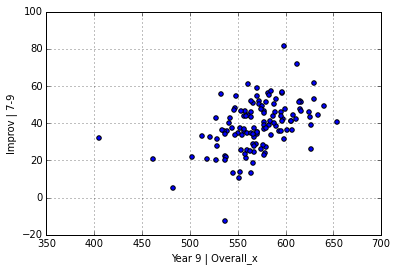

In [16]:
%pylab inline

newdf['Full-time equivalent enrolments_x'] = newdf['Full-time equivalent enrolments_x'].replace("-",np.NaN).astype('float')
newdf.plot(kind='scatter',x='Year 9 | Overall_x',y='Improv | 7-9')

In [6]:
newdf

,Unnamed: 0_x,Average ICSEA value_x,Boys_x,Completed senior secondary school_x,Full-time equivalent enrolments_x,Full-time equivalent non-teaching staff_x,Full-time equivalent teaching staff_x,Girls_x,Indigenous students_x,Location_x,...,Year 9 | Numeracy_y,Year 9 | Reading_y,Year 9 | Spelling_y,Year 9 | Writing_y,Year range_y,Year 3 | Overall_y,Year 5 | Overall_y,Year 7 | Overall_y,Year 9 | Overall_y,Improv | 7-9
0,0,1000,349,61,704.3,22.3,51.7,365,14%,Metropolitan,...,563,557,561,543,"U, R-12",346.2,454.8,514.6,555.8,22.4
1,7,1000,382,NaN,735,12.4,38.8,353,0%,Metropolitan,...,NaN,NaN,NaN,NaN,3-7,416.4,496.2,548.6,NaN,NaN
2,14,1000,202,NaN,388,13.7,25.4,186,13%,Metropolitan,...,NaN,NaN,NaN,NaN,"U, R-7",347.4,441.4,509.4,NaN,NaN
3,21,1000,191,NaN,399.2,3.9,21.5,209,3%,Metropolitan,...,NaN,NaN,NaN,NaN,R-7,409.0,487.0,539.8,NaN,NaN
4,28,1000,236,NaN,429,12.8,41.4,193,12%,Metropolitan,...,NaN,NaN,NaN,NaN,"U, R-7",338.2,394.6,498.0,NaN,NaN
5,32,1000,328,NaN,626,7.1,34.8,298,1%,Metropolitan,...,NaN,NaN,NaN,NaN,3-7,394.2,496.4,563.4,NaN,NaN
6,39,1000,162,NaN,304,9.3,17.4,142,9%,Metropolitan,...,NaN,NaN,NaN,NaN,R-7,392.2,488.8,535.0,NaN,NaN
7,46,1000,41,NaN,71,2.4,5.4,30,-,Provincial,...,NaN,NaN,NaN,NaN,"U, R-7",413.6,478.6,552.8,NaN,NaN
8,53,1000,130,20,247.3,9.2,21.2,121,2%,Remote,...,587,546,545,546,R-12,328.4,449.8,520.2,553.0,52.0
9,60,1000,196,35,364.2,14.9,26.9,171,2%,Provincial,...,550,547,538,521,R-12,355.8,419.8,499.6,538.0,61.0


In [7]:
df.columns

Index([u'Unnamed: 0', u'Average ICSEA value', u'Boys', u'Completed senior secondary school', u'Full-time equivalent enrolments', u'Full-time equivalent non-teaching staff', u'Full-time equivalent teaching staff', u'Girls', u'Indigenous students', u'Location', u'Name', u'Non-teaching staff', u'SMCLID', u'School ICSEA value', u'School sector', u'School type', u'School-based apprenticeships and traineeships', u'Senior secondary certificate awarded', u'Teaching staff', u'Total enrolments', u'VET enrolments', u'Year', u'Year 3 | Grammar', u'Year 3 | Numeracy', u'Year 3 | Reading', u'Year 3 | Spelling', u'Year 3 | Writing', u'Year 5 | Grammar', u'Year 5 | Numeracy', u'Year 5 | Reading', u'Year 5 | Spelling', u'Year 5 | Writing', u'Year 7 | Grammar', u'Year 7 | Numeracy', u'Year 7 | Reading', u'Year 7 | Spelling', u'Year 7 | Writing', u'Year 9 | Grammar', u'Year 9 | Numeracy', u'Year 9 | Reading', u'Year 9 | Spelling', u'Year 9 | Writing', u'Year range', u'Year 3 | Overall', u'Year 5 | Overal